# Big Data Analytics Hackathon  
1.   Gunika Dhingra  E20CSE244
2.   Siddansh Chawla E20CSE249



###Installing dependencies and importing models

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 43 kB/s 
     |████████████████████████████████| 199 kB 53.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=4f210afebbe1f1aea5bd9cca7a9495b8f5d71202d9c063745c55243f1c22ca53
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import split
from pyspark.sql.functions import avg, round
from pyspark.sql.functions import monotonically_increasing_id, row_number
from pyspark.sql.window import Window
from pyspark.sql.functions import format_number

In [ ]:
spark = SparkSession.builder.appName("BDA test 1").getOrCreate()

In [ ]:
spark

In [ ]:
data = spark.read.csv("ETH_1H.csv", header=True, inferSchema=True)

In [ ]:
print(f'There are {data.count()} rows and {len(data.columns)} columns')

There are 34497 rows and 8 columns


In [ ]:
data.show(5)

+--------------+--------------+------+------+------+------+------+-----------+
|Unix Timestamp|          Date|Symbol|  Open|  High|   Low| Close|     Volume|
+--------------+--------------+------+------+------+------+------+-----------+
|      1.587E12| 16/04/20 0:00|ETHUSD|152.94|152.94|150.39|150.39| 650.188125|
|    1.58699E12|15/04/20 23:00|ETHUSD|155.81|155.81|151.39|152.94|4277.567299|
|    1.58699E12|15/04/20 22:00|ETHUSD|157.18| 157.3|155.32|155.81|106.3372791|
|    1.58698E12|15/04/20 21:00|ETHUSD|158.04|158.31|157.16|157.18|55.24413059|
|    1.58698E12|15/04/20 20:00|ETHUSD| 157.1| 158.1|156.87|158.04| 144.262622|
+--------------+--------------+------+------+------+------+------+-----------+
only showing top 5 rows



In [ ]:
data.dtypes

[('Unix Timestamp', 'double'),
 ('Date', 'string'),
 ('Symbol', 'string'),
 ('Open', 'double'),
 ('High', 'double'),
 ('Low', 'double'),
 ('Close', 'double'),
 ('Volume', 'double')]

###Data Cleaning and Preparation

In [ ]:
data = data.na.drop(how='any')

In [ ]:
print(f'After removing null values there are {data.count()} rows and {len(data.columns)} columns')

After removing null values there are 34497 rows and 8 columns


In [ ]:
data = data.withColumn('New_Date', split(data['Date'], " ").getItem(0))\
           .withColumn('Time', split(data['Date'], " ").getItem(1))

data.show(5)

+--------------+--------------+------+------+------+------+------+-----------+--------+-----+
|Unix Timestamp|          Date|Symbol|  Open|  High|   Low| Close|     Volume|New_Date| Time|
+--------------+--------------+------+------+------+------+------+-----------+--------+-----+
|      1.587E12| 16/04/20 0:00|ETHUSD|152.94|152.94|150.39|150.39| 650.188125|16/04/20| 0:00|
|    1.58699E12|15/04/20 23:00|ETHUSD|155.81|155.81|151.39|152.94|4277.567299|15/04/20|23:00|
|    1.58699E12|15/04/20 22:00|ETHUSD|157.18| 157.3|155.32|155.81|106.3372791|15/04/20|22:00|
|    1.58698E12|15/04/20 21:00|ETHUSD|158.04|158.31|157.16|157.18|55.24413059|15/04/20|21:00|
|    1.58698E12|15/04/20 20:00|ETHUSD| 157.1| 158.1|156.87|158.04| 144.262622|15/04/20|20:00|
+--------------+--------------+------+------+------+------+------+-----------+--------+-----+
only showing top 5 rows



In [ ]:
data = data.withColumn('Day', split(data['New_Date'], "/").getItem(0))\
    .withColumn('Month', split(data['New_Date'], "/").getItem(1))\
    .withColumn('Year', split(data['New_Date'], "/").getItem(2))

data.show(5)

+--------------+--------------+------+------+------+------+------+-----------+--------+-----+---+-----+----+
|Unix Timestamp|          Date|Symbol|  Open|  High|   Low| Close|     Volume|New_Date| Time|Day|Month|Year|
+--------------+--------------+------+------+------+------+------+-----------+--------+-----+---+-----+----+
|      1.587E12| 16/04/20 0:00|ETHUSD|152.94|152.94|150.39|150.39| 650.188125|16/04/20| 0:00| 16|   04|  20|
|    1.58699E12|15/04/20 23:00|ETHUSD|155.81|155.81|151.39|152.94|4277.567299|15/04/20|23:00| 15|   04|  20|
|    1.58699E12|15/04/20 22:00|ETHUSD|157.18| 157.3|155.32|155.81|106.3372791|15/04/20|22:00| 15|   04|  20|
|    1.58698E12|15/04/20 21:00|ETHUSD|158.04|158.31|157.16|157.18|55.24413059|15/04/20|21:00| 15|   04|  20|
|    1.58698E12|15/04/20 20:00|ETHUSD| 157.1| 158.1|156.87|158.04| 144.262622|15/04/20|20:00| 15|   04|  20|
+--------------+--------------+------+------+------+------+------+-----------+--------+-----+---+-----+----+
only showing top 5 

In [ ]:
from pyspark.sql.functions import concat_ws

In [ ]:
data = data.withColumn("monthYear", concat_ws("/", "Month", "Year"))

In [ ]:
data.show(5)

+--------------+--------------+------+------+------+------+------+-----------+--------+-----+---+-----+----+---------+
|Unix Timestamp|          Date|Symbol|  Open|  High|   Low| Close|     Volume|New_Date| Time|Day|Month|Year|monthYear|
+--------------+--------------+------+------+------+------+------+-----------+--------+-----+---+-----+----+---------+
|      1.587E12| 16/04/20 0:00|ETHUSD|152.94|152.94|150.39|150.39| 650.188125|16/04/20| 0:00| 16|   04|  20|    04/20|
|    1.58699E12|15/04/20 23:00|ETHUSD|155.81|155.81|151.39|152.94|4277.567299|15/04/20|23:00| 15|   04|  20|    04/20|
|    1.58699E12|15/04/20 22:00|ETHUSD|157.18| 157.3|155.32|155.81|106.3372791|15/04/20|22:00| 15|   04|  20|    04/20|
|    1.58698E12|15/04/20 21:00|ETHUSD|158.04|158.31|157.16|157.18|55.24413059|15/04/20|21:00| 15|   04|  20|    04/20|
|    1.58698E12|15/04/20 20:00|ETHUSD| 157.1| 158.1|156.87|158.04| 144.262622|15/04/20|20:00| 15|   04|  20|    04/20|
+--------------+--------------+------+------+---

In [ ]:
data = data.drop('Date').drop('Time').drop('Unix Timestamp').drop('Symbol')

In [ ]:
data.show(5)

+------+------+------+------+-----------+--------+---+-----+----+---------+
|  Open|  High|   Low| Close|     Volume|New_Date|Day|Month|Year|monthYear|
+------+------+------+------+-----------+--------+---+-----+----+---------+
|152.94|152.94|150.39|150.39| 650.188125|16/04/20| 16|   04|  20|    04/20|
|155.81|155.81|151.39|152.94|4277.567299|15/04/20| 15|   04|  20|    04/20|
|157.18| 157.3|155.32|155.81|106.3372791|15/04/20| 15|   04|  20|    04/20|
|158.04|158.31|157.16|157.18|55.24413059|15/04/20| 15|   04|  20|    04/20|
| 157.1| 158.1|156.87|158.04| 144.262622|15/04/20| 15|   04|  20|    04/20|
+------+------+------+------+-----------+--------+---+-----+----+---------+
only showing top 5 rows



In [ ]:
data.count()

34497

In [ ]:
data = data.select("New_Date", "monthYear", "Day", "Month", "Year", "Open", "High", "Low", "Close", "Volume")

In [ ]:
data.show(5)

+--------+---------+---+-----+----+------+------+------+------+-----------+
|New_Date|monthYear|Day|Month|Year|  Open|  High|   Low| Close|     Volume|
+--------+---------+---+-----+----+------+------+------+------+-----------+
|16/04/20|    04/20| 16|   04|  20|152.94|152.94|150.39|150.39| 650.188125|
|15/04/20|    04/20| 15|   04|  20|155.81|155.81|151.39|152.94|4277.567299|
|15/04/20|    04/20| 15|   04|  20|157.18| 157.3|155.32|155.81|106.3372791|
|15/04/20|    04/20| 15|   04|  20|158.04|158.31|157.16|157.18|55.24413059|
|15/04/20|    04/20| 15|   04|  20| 157.1| 158.1|156.87|158.04| 144.262622|
+--------+---------+---+-----+----+------+------+------+------+-----------+
only showing top 5 rows



In [ ]:
data_select = data.select("Open", "High", "Low", "Close", "Volume")

In [ ]:
data_select = data_select.select([round(c,2).alias(c) for c in data_select.columns])

In [ ]:
data_select.show()

+------+------+------+------+-------+
|  Open|  High|   Low| Close| Volume|
+------+------+------+------+-------+
|152.94|152.94|150.39|150.39| 650.19|
|155.81|155.81|151.39|152.94|4277.57|
|157.18| 157.3|155.32|155.81| 106.34|
|158.04|158.31|157.16|157.18|  55.24|
| 157.1| 158.1|156.87|158.04| 144.26|
|157.78|157.84| 157.1| 157.1| 329.36|
|157.48| 158.2|157.48|157.78| 520.14|
|157.12|157.78| 156.9|157.48| 156.55|
|155.81|157.52|155.74|157.12| 430.08|
|157.12|157.15|155.81|155.81| 303.84|
|156.57|158.09|156.57|157.12| 747.87|
|156.46|157.67| 155.5|156.57| 320.06|
|157.45|157.76|155.58|156.46|1922.31|
|157.69|158.26|157.09|157.45| 993.97|
|159.05|159.76|157.25|157.69| 866.47|
|158.77|159.41|157.88|159.05| 108.16|
|159.84|160.02|158.44|158.77|  96.26|
|160.21|160.21|159.56|159.84|  57.71|
|160.91|161.52|160.07|160.21|  113.1|
|159.97|160.91|159.89|160.91|  72.62|
+------+------+------+------+-------+
only showing top 20 rows



In [ ]:
data = data.drop('Open').drop('High').drop('Low').drop('Close').drop('Volume')

In [ ]:
data.show(5)

+--------+---------+---+-----+----+
|New_Date|monthYear|Day|Month|Year|
+--------+---------+---+-----+----+
|16/04/20|    04/20| 16|   04|  20|
|15/04/20|    04/20| 15|   04|  20|
|15/04/20|    04/20| 15|   04|  20|
|15/04/20|    04/20| 15|   04|  20|
|15/04/20|    04/20| 15|   04|  20|
+--------+---------+---+-----+----+
only showing top 5 rows



In [ ]:
data = data.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
data_select = data_select.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))

data = data.join(data_select, on=["row_index"]).drop("row_index")
data.show()

+--------+---------+---+-----+----+------+------+------+------+-------+
|New_Date|monthYear|Day|Month|Year|  Open|  High|   Low| Close| Volume|
+--------+---------+---+-----+----+------+------+------+------+-------+
|16/04/20|    04/20| 16|   04|  20|152.94|152.94|150.39|150.39| 650.19|
|15/04/20|    04/20| 15|   04|  20|155.81|155.81|151.39|152.94|4277.57|
|15/04/20|    04/20| 15|   04|  20|157.18| 157.3|155.32|155.81| 106.34|
|15/04/20|    04/20| 15|   04|  20|158.04|158.31|157.16|157.18|  55.24|
|15/04/20|    04/20| 15|   04|  20| 157.1| 158.1|156.87|158.04| 144.26|
|15/04/20|    04/20| 15|   04|  20|157.78|157.84| 157.1| 157.1| 329.36|
|15/04/20|    04/20| 15|   04|  20|157.48| 158.2|157.48|157.78| 520.14|
|15/04/20|    04/20| 15|   04|  20|157.12|157.78| 156.9|157.48| 156.55|
|15/04/20|    04/20| 15|   04|  20|155.81|157.52|155.74|157.12| 430.08|
|15/04/20|    04/20| 15|   04|  20|157.12|157.15|155.81|155.81| 303.84|
|15/04/20|    04/20| 15|   04|  20|156.57|158.09|156.57|157.12| 

In [ ]:
data.dtypes

[('New_Date', 'string'),
 ('monthYear', 'string'),
 ('Day', 'string'),
 ('Month', 'string'),
 ('Year', 'string'),
 ('Open', 'double'),
 ('High', 'double'),
 ('Low', 'double'),
 ('Close', 'double'),
 ('Volume', 'double')]

In [ ]:
model1_data = data.groupBy('New_Date').agg(avg('Open').alias('Avg_Open'),avg('Close').alias('Avg_Close'))
model1_extra = data.groupBy('New_Date').sum('Volume').drop("New_Date")

In [ ]:
model1_data = model1_data.withColumn('row_number', row_number().over(Window.orderBy(monotonically_increasing_id())))
model1_extra = model1_extra.withColumn('row_number', row_number().over(Window.orderBy(monotonically_increasing_id())))

model1_data = model1_data.join(model1_extra, on=["row_number"]).drop("row_number")

In [ ]:
model1_data.show()

+--------+------------------+------------------+------------------+
|New_Date|          Avg_Open|         Avg_Close|       sum(Volume)|
+--------+------------------+------------------+------------------+
|16/04/20|            152.94|            150.39|            650.19|
|15/04/20|           158.145|157.90874999999997|16366.789999999999|
|14/04/20| 158.5029166666667|158.57125000000005|18061.580000000005|
|13/04/20|154.18708333333333|154.12083333333334|15698.310000000005|
|12/04/20|159.88750000000002|159.88333333333335|12877.339999999998|
|11/04/20|158.45416666666665|158.47083333333333|13761.710000000001|
|10/04/20|160.62041666666667|160.08291666666665|          35635.45|
|09/04/20|         170.93875|170.84208333333333|          17001.42|
|08/04/20|169.59416666666667|            169.96|20071.039999999997|
|07/04/20|170.75958333333332|170.47666666666666| 46133.40999999999|
|06/04/20|         154.95625|156.14166666666668|59235.609999999986|
|05/04/20|143.50791666666666|          143.4375|

In [ ]:
model1_data = model1_data.withColumn('Weighted_Price',(model1_data.Avg_Open+model1_data.Avg_Close)/2)

In [ ]:
model1_data.show()

+--------+------------------+------------------+------------------+------------------+------------------+
|New_Date|          Avg_Open|         Avg_Close|       sum(Volume)|    Weighted_Price|           Average|
+--------+------------------+------------------+------------------+------------------+------------------+
|16/04/20|            152.94|            150.39|            650.19|           151.665|           151.665|
|15/04/20|           158.145|157.90874999999997|16366.789999999999|        158.026875|        158.026875|
|14/04/20| 158.5029166666667|158.57125000000005|18061.580000000005|158.53708333333338|158.53708333333338|
|13/04/20|154.18708333333333|154.12083333333334|15698.310000000005|154.15395833333332|154.15395833333332|
|12/04/20|159.88750000000002|159.88333333333335|12877.339999999998|159.88541666666669|159.88541666666669|
|11/04/20|158.45416666666665|158.47083333333333|13761.710000000001|158.46249999999998|158.46249999999998|
|10/04/20|160.62041666666667|160.0829166666666

In [ ]:
model1_data.dtypes

[('New_Date', 'string'),
 ('Avg_Open', 'double'),
 ('Avg_Close', 'double'),
 ('sum(Volume)', 'double'),
 ('Weighted_Price', 'double'),
 ('Average', 'double')]

###Data visualization

In [ ]:
import pyspark.sql.functions as f

In [ ]:
data_monthly_volume = data.groupBy('monthYear').sum('Volume')
data_monthly_volume = data_monthly_volume.withColumn('index', f.monotonically_increasing_id()).orderBy(f.col('index').desc()).drop('index')
data_monthly_volume.show()

+---------+------------------+
|monthYear|       sum(Volume)|
+---------+------------------+
|    05/16|133367.37999999992|
|    06/16|391415.16999999987|
|    07/16|131222.46000000005|
|    08/16| 86774.35999999997|
|    09/16| 64526.57999999999|
|    10/16| 65610.40000000004|
|    11/16|49769.100000000006|
|    12/16| 76090.05000000005|
|    01/17| 182287.0499999999|
|    02/17|2752788.5300000035|
|    03/17|        2292111.84|
|    04/17|471526.29000000015|
|    05/17|2670782.8800000027|
|    06/17| 3265084.420000006|
|    07/17| 5987820.120000006|
|    08/17|3936314.1800000025|
|    09/17| 2876855.599999998|
|    10/17| 911667.0300000006|
|    11/17| 1546950.080000001|
|    12/17|         2600014.3|
+---------+------------------+
only showing top 20 rows



In [ ]:
pd1 = data_monthly_volume.toPandas()

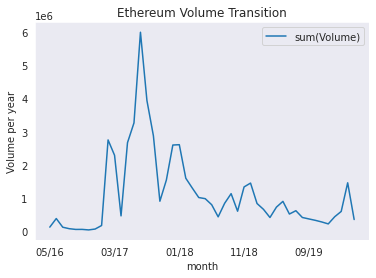

In [ ]:
pd1.plot(kind='line', x='monthYear', y='sum(Volume)')
plt.xlabel('month')            
plt.ylabel('Volume per year')
plt.title('Ethereum Volume Transition') 
plt.show()

In [ ]:
data = data.withColumn('Average price',(data.Open+data.Close)/2)
data_monthly_avg = data.groupBy('monthYear').max('Average price')
data_monthly_avg = data_monthly_avg.withColumn('index', f.monotonically_increasing_id()).orderBy(f.col('index').desc()).drop('index')
data_monthly_avg.show()

+---------+------------------+
|monthYear|max(Average price)|
+---------+------------------+
|    05/16|             14.75|
|    06/16|             21.09|
|    07/16|            15.375|
|    08/16|             12.68|
|    09/16|             14.34|
|    10/16|              13.7|
|    11/16|             11.57|
|    12/16|             8.725|
|    01/17|            11.805|
|    02/17|16.119999999999997|
|    03/17|             53.56|
|    04/17|            78.705|
|    05/17|            230.74|
|    06/17|           393.575|
|    07/17|289.07000000000005|
|    08/17|            388.53|
|    09/17|            394.52|
|    10/17|            346.38|
|    11/17|502.40999999999997|
|    12/17|           858.385|
+---------+------------------+
only showing top 20 rows



In [ ]:
pd2 = data_monthly_avg.toPandas()

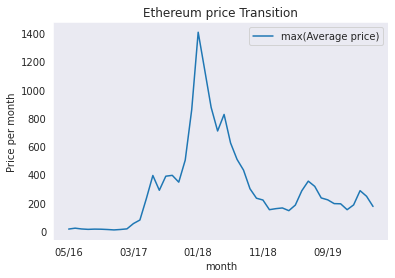

In [ ]:
pd2.plot(kind='line', x='monthYear', y='max(Average price)')
plt.xlabel('month')            
plt.ylabel('Price per month')
plt.title('Ethereum price Transition') 
plt.show()

###Linear Regression model

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [ ]:
featureassembler = VectorAssembler(inputCols = ["Avg_Open","Avg_Close","sum(Volume)", "Weighted_Price"], outputCol = "features")
data_assembled = featureassembler.transform(model1_data)  

In [ ]:
data_assembled.show(truncate=False)

+--------+------------------+------------------+------------------+------------------+------------------+-----------------------------------------------------------------------------+
|New_Date|Avg_Open          |Avg_Close         |sum(Volume)       |Weighted_Price    |Average           |features                                                                     |
+--------+------------------+------------------+------------------+------------------+------------------+-----------------------------------------------------------------------------+
|16/04/20|152.94            |150.39            |650.19            |151.665           |151.665           |[152.94,150.39,650.19,151.665]                                               |
|15/04/20|158.145           |157.90874999999997|16366.789999999999|158.026875        |158.026875        |[158.145,157.90874999999997,16366.789999999999,158.026875]                   |
|14/04/20|158.5029166666667 |158.57125000000005|18061.580000000005|158.537083333

In [ ]:
train_data, test_data = data_assembled.randomSplit([0.75, 0.25])

In [ ]:
lr = (LinearRegression(featuresCol='features' , labelCol="Weighted_Price", predictionCol='Predicted_price', 
                               maxIter=100, regParam=0.3, elasticNetParam=0.8, standardization=False))
regressor = lr.fit(train_data)

In [ ]:
pred_results = regressor.evaluate(test_data)
results = pred_results.predictions.select('Avg_Open', 'Avg_Close', 'Weighted_Price','Predicted_price')

In [ ]:
results.show(5)

+------------------+------------------+------------------+------------------+
|          Avg_Open|         Avg_Close|    Weighted_Price|   Predicted_price|
+------------------+------------------+------------------+------------------+
|133.39833333333334|133.76000000000002|133.57916666666668|133.57968936636198|
|10.708749999999997|10.707499999999998|10.708124999999997| 10.70921812926977|
|         135.50875|135.51749999999998|        135.513125|135.51352282247714|
| 219.6916666666667|219.71249999999998|219.70208333333335|219.70211125024554|
|           50.1275| 50.20458333333334| 50.16604166666667| 50.16685542420254|
+------------------+------------------+------------------+------------------+
only showing top 5 rows



In [ ]:
results = results.sort(results.Weighted_Price.asc())
results.show()

+------------------+------------------+------------------+------------------+
|          Avg_Open|         Avg_Close|    Weighted_Price|   Predicted_price|
+------------------+------------------+------------------+------------------+
|           7.70375| 7.693750000000002| 7.698750000000001| 7.699703381593969|
| 7.892916666666665| 7.866249999999998| 7.879583333333331|  7.88053229982867|
|7.8929166666666655|7.9049999999999985| 7.898958333333332|  7.89991707461848|
|           8.02875| 7.997083333333332| 8.012916666666666| 8.013888226439905|
|  8.03083333333333| 8.001249999999995| 8.016041666666663| 8.016991232417446|
|            8.1825| 8.180416666666664| 8.181458333333332| 8.182412784898501|
| 8.359583333333333| 8.375833333333333| 8.367708333333333| 8.368667459766181|
| 8.413333333333332| 8.411249999999997| 8.412291666666665| 8.413245122080735|
| 8.859583333333333| 8.909583333333332| 8.884583333333332| 8.885562422291672|
| 8.931250000000002| 8.904583333333335| 8.917916666666668| 8.918

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
evaluator = RegressionEvaluator(
    labelCol="Weighted_Price", predictionCol="Predicted_price", metricName="rmse")
rmse = evaluator.evaluate(results)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.00116758


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

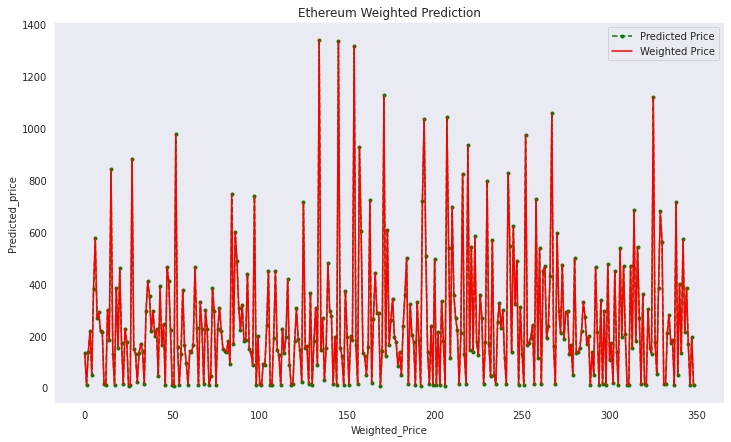

In [ ]:
pred_results=regressor.evaluate(test_data)
weighted_price = pred_results.predictions.select('Weighted_Price').toPandas()
predicted_price = pred_results.predictions.select("Predicted_price").toPandas()
plt.figure(figsize=(12,7))
plt.plot(weighted_price, color='green', marker='.', linestyle='dashed', label='Predicted Price')
plt.plot(predicted_price, color='red', label='Weighted Price')
plt.title('Ethereum Weighted Prediction')
plt.xlabel('Weighted_Price')
plt.ylabel('Predicted_price')
plt.legend()

###Data Forecasting using Prophet timeseries model

In [2]:
data1 = data.filter(~(data['Year'] == 20))

In [ ]:
data1.show(50)

+--------------+--------+---------+---+-----+----+-----+----+----+---+-----+------+
|Unix Timestamp|New_Date|monthYear|Day|Month|Year| Time|Open|High|Low|Close|Volume|
+--------------+--------+---------+---+-----+----+-----+----+----+---+-----+------+
| 1577830000000|31/12/19|    12/19| 31|   12|  19|23:00| 128| 128|127|  128|   128|
| 1577830000000|31/12/19|    12/19| 31|   12|  19|22:00| 128| 128|127|  128|   128|
| 1577830000000|31/12/19|    12/19| 31|   12|  19|21:00| 127| 128|127|  128|   128|
| 1577820000000|31/12/19|    12/19| 31|   12|  19|20:00| 127| 128|127|  127|   127|
| 1577820000000|31/12/19|    12/19| 31|   12|  19|19:00| 128| 128|127|  127|   127|
| 1577820000000|31/12/19|    12/19| 31|   12|  19|18:00| 128| 129|128|  128|   128|
| 1577810000000|31/12/19|    12/19| 31|   12|  19|17:00| 129| 129|128|  128|   128|
| 1577810000000|31/12/19|    12/19| 31|   12|  19|16:00| 129| 130|128|  129|   129|
| 1577800000000|31/12/19|    12/19| 31|   12|  19|15:00| 131| 131|128|  129|

In [ ]:
data1.dtypes

[('Unix Timestamp', 'bigint'),
 ('New_Date', 'string'),
 ('monthYear', 'string'),
 ('Day', 'int'),
 ('Month', 'int'),
 ('Year', 'int'),
 ('Time', 'string'),
 ('Volume', 'int'),
 ('Open', 'int'),
 ('High', 'int'),
 ('Low', 'int'),
 ('Close', 'int')]

In [ ]:
# model1_data = data1.groupBy('New_Date').agg(avg('Open').alias('Avg_Open'),avg('Close').alias('Avg_Close'), sum('Volume').alias('Vol'))

In [ ]:
model1_data.show()

+--------+------------------+------------------+
|New_Date|          Avg_Open|         Avg_Close|
+--------+------------------+------------------+
|31/12/19|129.91666666666666|129.79166666666666|
|30/12/19|             132.5|           132.375|
|29/12/19|            129.75|130.04166666666666|
|28/12/19|           127.125|127.16666666666667|
|27/12/19|124.58333333333333|           124.625|
|26/12/19|            125.25|125.29166666666667|
|25/12/19|124.79166666666667|124.66666666666667|
|24/12/19|127.54166666666667|             127.5|
|23/12/19|           131.375|131.20833333333334|
|22/12/19|           128.875|           129.125|
|21/12/19|126.95833333333333|           126.875|
|20/12/19|127.16666666666667|127.16666666666667|
|19/12/19|127.20833333333333|127.04166666666667|
|18/12/19|124.41666666666667|           124.875|
|17/12/19|128.47826086956522|             128.0|
|16/12/19|138.79166666666666|           138.375|
|15/12/19|           141.625|141.66666666666666|
|14/12/19|142.666666

In [ ]:
model2_data = data1.groupBy('New_Date').agg(avg('Volume').alias('Avg_Vol'))
model2_data.show()

+--------+------------------+
|New_Date|           Avg_Vol|
+--------+------------------+
|31/12/19| 385.6842105263158|
|30/12/19| 321.1304347826087|
|29/12/19| 321.2916666666667|
|28/12/19|153.04166666666666|
|27/12/19|204.82608695652175|
|26/12/19| 148.8695652173913|
|25/12/19|140.08333333333334|
|24/12/19|115.78260869565217|
|23/12/19|280.42105263157896|
|22/12/19|164.17391304347825|
|21/12/19|101.66666666666667|
|20/12/19|237.27272727272728|
|19/12/19| 316.1304347826087|
|18/12/19| 418.8095238095238|
|17/12/19|          385.6875|
|16/12/19|             204.0|
|15/12/19|114.41666666666667|
|14/12/19| 95.29166666666667|
|13/12/19|130.04347826086956|
|12/12/19|242.28571428571428|
+--------+------------------+
only showing top 20 rows



In [ ]:
model2_data = model1_data.withColumn('Average',(model1_data.Avg_Open+model1_data.Avg_Close)/2)

In [ ]:
model2_data = model2_data.select("New_Date", "Average")

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
modelData = model2_data.select('New_Date', 'Average')
pandasDF = modelData.toPandas()
print(pandasDF)

      New_Date     Average
0     31/12/19  129.854167
1     30/12/19  132.437500
2     29/12/19  129.895833
3     28/12/19  127.145833
4     27/12/19  124.604167
...        ...         ...
1327  13/05/16   10.208333
1328  12/05/16   10.125000
1329  11/05/16    9.062500
1330  10/05/16    9.000000
1331  09/05/16    8.681818

[1332 rows x 2 columns]


In [ ]:
# Select columns
s1i1 = pandasDF[["New_Date", "Average"]]
# Prophet wants us to name columns as shown below
s1i1.columns = ["ds", "y"]
# instantiate the model and set parameters
model = Prophet(
    interval_width=0.95,
    growth='linear',
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=True,
    seasonality_mode='additive'
)
# fit the model to historical data
model.fit(s1i1);

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwdbv33bt/pkxkkj14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwdbv33bt/i0fxgrgh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74717', 'data', 'file=/tmp/tmpwdbv33bt/pkxkkj14.json', 'init=/tmp/tmpwdbv33bt/i0fxgrgh.json', 'output', 'file=/tmp/tmpwdbv33bt/prophet_modelqr5ewb6o/prophet_model-20221129065935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:59:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:59:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=106)
future.tail()

,ds
1433,2020-04-11
1434,2020-04-12
1435,2020-04-13
1436,2020-04-14
1437,2020-04-15


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
1418,2020-03-27,163.177993,-91.258401,416.245628
1419,2020-03-28,166.728012,-71.071924,420.821573
1420,2020-03-29,170.460417,-92.763796,409.459510
1421,2020-03-30,174.266636,-86.173359,428.093223
1422,2020-03-31,178.040674,-85.782781,411.592804
1423,2020-04-01,181.681825,-85.962938,454.204754
1424,2020-04-02,185.097230,-81.231994,424.478460
1425,2020-04-03,188.204186,-65.136871,441.239719
1426,2020-04-04,190.932171,-87.325052,445.126744
1427,2020-04-05,193.224518,-63.096295,466.815156


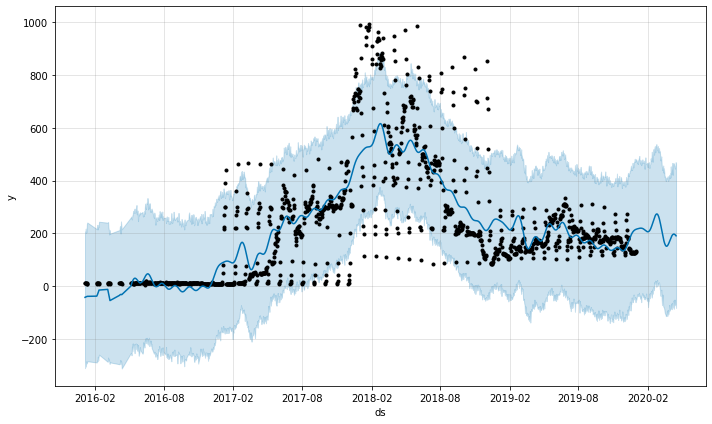

In [ ]:
fig1 = model.plot(forecast)